In [43]:
!python --version

Python 3.11.3


Test notebook to try out the Amazon SageMaker Studio. Lets get a submission to the Spaceship Titatic Kaggle competition.

Lets get the basic data loaded

In [44]:
!pip install kaggle


[notice] A new release of pip available: 22.3.1 -> 23.2.1
[notice] To update, run: pip install --upgrade pip


Lets get the Kaggle token installed. Manually move the kaggle jason file to the root .kaggle folder.

Lets download the data

In [45]:
!kaggle competitions download -c spaceship-titanic

Traceback (most recent call last):
  File "/Users/rohitzacharia/.pyenv/versions/3.11.3/bin/kaggle", line 5, in <module>
    from kaggle.cli import main
  File "/Users/rohitzacharia/.pyenv/versions/3.11.3/lib/python3.11/site-packages/kaggle/__init__.py", line 23, in <module>
    api.authenticate()
  File "/Users/rohitzacharia/.pyenv/versions/3.11.3/lib/python3.11/site-packages/kaggle/api/kaggle_api_extended.py", line 403, in authenticate
    raise IOError('Could not find {}. Make sure it\'s located in'
OSError: Could not find kaggle.json. Make sure it's located in /Users/rohitzacharia/.kaggle. Or use the environment method.


Now to unzip it.

In [46]:
# !unzip ./spaceship-titanic.zip

Cool. Lets get the basic data into a dataframe.

In [89]:
import pandas as pd
import numpy as np
tdata = pd.read_csv('train.csv')

In [90]:
tdata.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True


Lets get some basic summary statistics going.

In [91]:
tdata.describe(include = 'all')

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
count,8693,8492,8476,8494,8511,8514.000000,8490,8512.000000,8510.000000,8485.000000,8510.000000,8505.000000,8493,8693
unique,8693,3,2,6560,3,NaN,2,NaN,NaN,NaN,NaN,NaN,8473,2
top,0001_01,Earth,False,G/734/S,TRAPPIST-1e,NaN,False,NaN,NaN,NaN,NaN,NaN,Gollux Reedall,True
freq,1,4602,5439,8,5915,NaN,8291,NaN,NaN,NaN,NaN,NaN,2,4378
mean,NaN,NaN,NaN,NaN,NaN,28.827930,NaN,224.687617,458.077203,173.729169,311.138778,304.854791,NaN,NaN
std,NaN,NaN,NaN,NaN,NaN,14.489021,NaN,666.717663,1611.489240,604.696458,1136.705535,1145.717189,NaN,NaN
min,NaN,NaN,NaN,NaN,NaN,0.000000,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,NaN
25%,NaN,NaN,NaN,NaN,NaN,19.000000,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,NaN
50%,NaN,NaN,NaN,NaN,NaN,27.000000,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,NaN
75%,NaN,NaN,NaN,NaN,NaN,38.000000,NaN,47.000000,76.000000,27.000000,59.000000,46.000000,NaN,NaN


Lets check for missing values

In [92]:
tdata.isna().sum()

PassengerId       0
HomePlanet      201
CryoSleep       217
Cabin           199
Destination     182
Age             179
VIP             203
RoomService     181
FoodCourt       183
ShoppingMall    208
Spa             183
VRDeck          188
Name            200
Transported       0
dtype: int64

In [93]:
tdata.dtypes

PassengerId      object
HomePlanet       object
CryoSleep        object
Cabin            object
Destination      object
Age             float64
VIP              object
RoomService     float64
FoodCourt       float64
ShoppingMall    float64
Spa             float64
VRDeck          float64
Name             object
Transported        bool
dtype: object

Turns out this is not really needed.

<!-- Ok so we now need to convert some of these 'objects' to boolean to ensure it plays nicely with FastAI. -->

In [94]:
def boolify (df):
    df['VIP']=df['VIP'].astype('bool')
    df['CryoSleep']=df['CryoSleep'].astype('bool')
    return df

Note: We are basically making the assumption that NA values are 0.

In [95]:
tdata.isna().sum()

PassengerId       0
HomePlanet      201
CryoSleep         0
Cabin           199
Destination     182
Age             179
VIP               0
RoomService     181
FoodCourt       183
ShoppingMall    208
Spa             183
VRDeck          188
Name            200
Transported       0
dtype: int64

In [96]:
tdata.dtypes

PassengerId      object
HomePlanet       object
CryoSleep          bool
Cabin            object
Destination      object
Age             float64
VIP                bool
RoomService     float64
FoodCourt       float64
ShoppingMall    float64
Spa             float64
VRDeck          float64
Name             object
Transported        bool
dtype: object

Again not really needed.

<!-- We basically now need to turns all the bool into uint8 to fix an error with FastAi code. -->

In [55]:
# # workaround for fastai/pytorch bug where bool is treated as object and thus erroring out.
# for n in tdata:
#     if pd.api.types.is_bool_dtype(tdata[n]):
#         tdata[n] = tdata[n].astype('uint8')

In [56]:
tdata.dtypes

PassengerId      object
HomePlanet       object
CryoSleep          bool
Cabin            object
Destination      object
Age             float64
VIP                bool
RoomService     float64
FoodCourt       float64
ShoppingMall    float64
Spa             float64
VRDeck          float64
Name             object
Transported        bool
dtype: object

### Feature Engineering

Lets get some basic feature engineering going.

First up, lets get the cabin sorted out into decks, cabin numbers and side of the ship.

In [97]:
tdata['Cabin'][:10]

0    B/0/P
1    F/0/S
2    A/0/S
3    A/0/S
4    F/1/S
5    F/0/P
6    F/2/S
7    G/0/S
8    F/3/S
9    B/1/P
Name: Cabin, dtype: object

In [99]:
#Re-writing this to make it a function
def split_cabin (df):
    df[['Cabin_Deck', 'Cabin_number', 'Cabin_side']] = df['Cabin'].str.split('/',expand=True)
    return df

Alright, lets get Passenger group sorted. I think we need to get this into two columns. Group_size and # of Family.

In [100]:
# Re-writing to make this a function
def passenger_group(df):
    df[['PassengerID_Group','PassengerID_Number']] = df['PassengerId'].str.split('_',expand=True)
    return df

In [101]:
# Re-writing to make it a function

def add_party_size (df):

    def get_party_size(grp):
        ans = []
        for grp_id in grp:
            ans.append(len(tdata.loc[tdata['PassengerID_Group'] == grp_id]))
        return ans

    df['PassengerID_GroupSize'] = get_party_size(df['PassengerID_Group'])
    return df

Ok lets call all the feature eng functions together.

In [102]:
def add_features(df):
    boolify(df)
    split_cabin(df)
    passenger_group(df)
    add_party_size (df)
    return df.head()

add_features(tdata)

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported,Cabin_Deck,Cabin_number,Cabin_side,PassengerID_Group,PassengerID_Number,PassengerID_GroupSize
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False,B,0,P,0001,01,1
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True,F,0,S,0002,01,1
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False,A,0,S,0003,01,2
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False,A,0,S,0003,02,2
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True,F,1,S,0004,01,1


In [103]:
tdata.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported,Cabin_Deck,Cabin_number,Cabin_side,PassengerID_Group,PassengerID_Number,PassengerID_GroupSize
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False,B,0,P,0001,01,1
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True,F,0,S,0002,01,1
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False,A,0,S,0003,01,2
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False,A,0,S,0003,02,2
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True,F,1,S,0004,01,1


Cool. Lets get a basic linear regression model going.

In [62]:
cat_vars = list(tdata.select_dtypes(['object','bool']).columns)
cat_vars.remove('Name')
cat_vars.remove('PassengerId')
cat_vars.remove('Transported')
cat_vars.remove('Cabin')
cat_vars.remove('PassengerID_Group')
cat_vars.remove('PassengerID_Number')
print(cat_vars)

cont_vars = list(tdata.select_dtypes(['int','float']).columns)
print(cont_vars)

not_used_vars = ['Name','PassengerId', 'Cabin', 'PassengerID_Group', 'PassengerID_Number']
print(not_used_vars)

total_columns = len(cont_vars)+len(cat_vars)+len(not_used_vars)
print(total_columns)
tdata.shape

['HomePlanet', 'CryoSleep', 'Destination', 'VIP', 'Cabin_Deck', 'Cabin_number', 'Cabin_side']
['Age', 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck', 'PassengerID_GroupSize']
['Name', 'PassengerId', 'Cabin', 'PassengerID_Group', 'PassengerID_Number']
19


(8693, 20)

In [63]:
tdata['Transported'].dtype
# dep_vars = list(tdata.select_dtypes('bool').columns)
dep_vars = ['Transported']
print(dep_vars)

['Transported']


In [64]:
from fastai.tabular.all import *

Lets get all the basic column names into variables. This will come in handy later.

Lets get a basic tabular pandas model going.

In [65]:
# for n in tdata:
#     if pd.api.types.is_object_dtype(tdata[n]):
#         tdata[n] = tdata[n].astype('category')

Critical error here!! Make sure you dont pass in strings!! You are trying to pass in the actual objects!!

In [66]:
procs = [Categorify, FillMissing, Normalize]

In [67]:
splits = RandomSplitter(valid_pct=0.2)(tdata)

In [68]:
to = TabularPandas(tdata,splits = splits, do_setup=True, procs = procs,
                   cat_names = cat_vars, cont_names = cont_vars,
                   y_names = dep_vars, y_block = CategoryBlock())
to.show()

,HomePlanet,CryoSleep,Destination,VIP,Cabin_Deck,Cabin_number,Cabin_side,Age_na,RoomService_na,FoodCourt_na,ShoppingMall_na,Spa_na,VRDeck_na,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,PassengerID_GroupSize,Transported
1060,Europa,True,55 Cancri e,False,#na#,#na#,#na#,False,False,False,False,False,False,13.0,0.0,0.0,0.0,0.0,0.0,1.0,True
7158,Europa,True,55 Cancri e,False,B,290,S,False,False,False,False,True,False,44.0,0.0,0.0,0.0,0.0,0.0,1.0,True
8383,#na#,False,TRAPPIST-1e,False,F,1839,P,False,False,False,False,False,False,21.0,0.0,6.0,0.0,593.0,0.0,5.0,False
441,Earth,False,PSO J318.5-22,False,F,87,S,False,False,False,False,False,False,37.0,0.0,10.0,544.0,9.0,299.0,1.0,False
2745,Earth,True,55 Cancri e,False,G,479,P,False,False,False,False,False,False,39.0,0.0,0.0,0.0,0.0,0.0,1.0,True
5545,Earth,True,55 Cancri e,False,G,961,S,False,False,False,False,False,False,2.0,0.0,0.0,0.0,0.0,0.0,3.0,True
1682,Earth,False,55 Cancri e,False,G,281,S,False,False,False,False,False,False,42.0,28.0,0.0,0.0,0.0,591.0,2.0,False
2246,#na#,True,TRAPPIST-1e,False,C,86,S,False,False,False,False,False,False,44.0,0.0,0.0,0.0,0.0,0.0,4.0,True
641,Earth,True,PSO J318.5-22,False,G,102,P,False,False,False,False,False,False,46.0,0.0,0.0,0.0,0.0,0.0,1.0,True
8604,Europa,False,55 Cancri e,False,C,307,P,False,False,False,False,False,False,34.0,0.0,5.0,11.0,62.0,5804.0,1.0,False


In [69]:
to.ys

,Transported
1060,1
7158,1
8383,0
441,0
2745,1
...,...
8543,0
5162,1
3456,0
664,1


In [70]:
to.xs.iloc[:2]

,HomePlanet,CryoSleep,Destination,VIP,Cabin_Deck,Cabin_number,Cabin_side,Age_na,RoomService_na,FoodCourt_na,ShoppingMall_na,Spa_na,VRDeck_na,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,PassengerID_GroupSize
1060,2,2,1,1,0,0,0,1,1,1,1,1,1,-1.099853,-0.344625,-0.293621,-0.279094,-0.277726,-0.264802,-0.650107
7158,2,2,1,1,2,1033,2,1,1,1,1,2,1,1.052368,-0.344625,-0.293621,-0.279094,-0.277726,-0.264802,-0.650107


In [71]:
to.cats

,HomePlanet,CryoSleep,Destination,VIP,Cabin_Deck,Cabin_number,Cabin_side,Age_na,RoomService_na,FoodCourt_na,ShoppingMall_na,Spa_na,VRDeck_na
1060,2,2,1,1,0,0,0,1,1,1,1,1,1
7158,2,2,1,1,2,1033,2,1,1,1,1,2,1
8383,0,1,3,1,6,880,1,1,1,1,1,1,1
441,1,1,2,1,6,1675,2,1,1,1,1,1,1
2745,1,2,1,1,7,1242,1,1,1,1,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8543,3,1,3,1,5,1375,2,1,1,1,1,1,1
5162,1,2,3,1,7,1696,2,1,1,1,1,1,1
3456,1,2,3,1,7,1380,1,1,1,1,1,1,1
664,3,2,3,1,5,1254,2,1,1,1,1,1,1


In [72]:
to.conts

,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,PassengerID_GroupSize
1060,-1.099853,-0.344625,-0.293621,-0.279094,-0.277726,-0.264802,-0.650107
7158,1.052368,-0.344625,-0.293621,-0.279094,-0.277726,-0.264802,-0.650107
8383,-0.544441,-0.344625,-0.289491,-0.279094,0.271070,-0.264802,1.866027
441,0.566382,-0.344625,-0.286737,0.606361,-0.269397,0.002390,-0.650107
2745,0.705235,-0.344625,-0.293621,-0.279094,-0.277726,-0.264802,-0.650107
...,...,...,...,...,...,...,...
8543,-0.197309,0.845059,-0.293621,1.830373,-0.203690,-0.264802,-0.650107
5162,-0.752721,-0.344625,-0.293621,-0.279094,-0.277726,-0.264802,1.236994
3456,-0.891574,-0.344625,-0.293621,-0.279094,-0.277726,-0.264802,1.236994
664,-0.405588,-0.344625,-0.293621,-0.279094,-0.277726,-0.264802,0.607960


In [73]:
to.xs

,HomePlanet,CryoSleep,Destination,VIP,Cabin_Deck,Cabin_number,Cabin_side,Age_na,RoomService_na,FoodCourt_na,ShoppingMall_na,Spa_na,VRDeck_na,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,PassengerID_GroupSize
1060,2,2,1,1,0,0,0,1,1,1,1,1,1,-1.099853,-0.344625,-0.293621,-0.279094,-0.277726,-0.264802,-0.650107
7158,2,2,1,1,2,1033,2,1,1,1,1,2,1,1.052368,-0.344625,-0.293621,-0.279094,-0.277726,-0.264802,-0.650107
8383,0,1,3,1,6,880,1,1,1,1,1,1,1,-0.544441,-0.344625,-0.289491,-0.279094,0.271070,-0.264802,1.866027
441,1,1,2,1,6,1675,2,1,1,1,1,1,1,0.566382,-0.344625,-0.286737,0.606361,-0.269397,0.002390,-0.650107
2745,1,2,1,1,7,1242,1,1,1,1,1,1,1,0.705235,-0.344625,-0.293621,-0.279094,-0.277726,-0.264802,-0.650107
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8543,3,1,3,1,5,1375,2,1,1,1,1,1,1,-0.197309,0.845059,-0.293621,1.830373,-0.203690,-0.264802,-0.650107
5162,1,2,3,1,7,1696,2,1,1,1,1,1,1,-0.752721,-0.344625,-0.293621,-0.279094,-0.277726,-0.264802,1.236994
3456,1,2,3,1,7,1380,1,1,1,1,1,1,1,-0.891574,-0.344625,-0.293621,-0.279094,-0.277726,-0.264802,1.236994
664,3,2,3,1,5,1254,2,1,1,1,1,1,1,-0.405588,-0.344625,-0.293621,-0.279094,-0.277726,-0.264802,0.607960


Lets create a dataloader

In [74]:
to.cats.dtypes

HomePlanet          int8
CryoSleep           int8
Destination         int8
VIP                 int8
Cabin_Deck          int8
Cabin_number       int16
Cabin_side          int8
Age_na              int8
RoomService_na      int8
FoodCourt_na        int8
ShoppingMall_na     int8
Spa_na              int8
VRDeck_na           int8
dtype: object

SO! The following cell was just to resolve the error I got using FastAI. Critical error was not passing in proc objects - I kept sending in strings!

In [75]:
tensor(to.cats)

tensor([[2, 2, 1,  ..., 1, 1, 1],
        [2, 2, 1,  ..., 1, 2, 1],
        [0, 1, 3,  ..., 1, 1, 1],
        ...,
        [1, 2, 3,  ..., 1, 1, 1],
        [3, 2, 3,  ..., 1, 1, 1],
        [3, 2, 3,  ..., 1, 1, 1]], dtype=torch.int16)

In [76]:
dls = to.dataloaders(path = '.')
dls.show_batch()

,HomePlanet,CryoSleep,Destination,VIP,Cabin_Deck,Cabin_number,Cabin_side,Age_na,RoomService_na,FoodCourt_na,ShoppingMall_na,Spa_na,VRDeck_na,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,PassengerID_GroupSize,Transported
0,Earth,True,TRAPPIST-1e,False,G,757,S,False,False,False,False,False,False,46.000000,0.000008,-0.000009,0.000007,0.000005,-0.000009,1.0,False
1,Mars,True,TRAPPIST-1e,False,F,761,S,True,False,False,False,False,False,27.000000,0.000008,-0.000009,0.000007,0.000005,-0.000009,5.0,True
2,Mars,False,TRAPPIST-1e,False,E,387,S,False,False,False,False,False,False,19.000000,299.999998,4.999995,642.000013,0.000005,-0.000009,1.0,False
3,Earth,False,TRAPPIST-1e,False,G,145,P,False,True,True,False,False,False,50.999999,0.000008,-0.000009,4.000009,0.000005,-0.000009,2.0,False
4,Earth,True,PSO J318.5-22,False,G,71,P,False,False,False,False,False,False,32.000000,0.000008,-0.000009,0.000007,0.000005,-0.000009,2.0,True
5,Earth,True,TRAPPIST-1e,False,G,1215,P,False,False,False,False,False,False,41.000000,0.000008,-0.000009,0.000007,0.000005,-0.000009,2.0,True
6,Earth,False,55 Cancri e,False,F,1535,S,False,False,False,False,False,False,27.000000,31.000003,224.999998,330.999996,0.000005,13.999988,2.0,False
7,Earth,False,TRAPPIST-1e,False,F,1412,S,False,False,False,False,False,False,22.000000,0.000008,-0.000009,0.999994,94.999996,605.000014,1.0,False
8,Europa,True,55 Cancri e,False,C,132,S,False,False,False,False,False,False,22.000000,0.000008,-0.000009,0.000007,0.000005,-0.000009,1.0,True
9,Earth,False,TRAPPIST-1e,False,F,905,P,False,False,False,False,False,False,23.000000,0.000008,-0.000009,206.000001,681.000005,31.000005,1.0,False


In [77]:
learn = tabular_learner(dls, metrics = accuracy)

In [78]:
learn.summary()

TabularModel (Input shape: 64 x 13)
Layer (type)         Output Shape         Param #    Trainable 
                     64 x 3              
Embedding                                 12         True      
Embedding                                 9          True      
Embedding                                 12         True      
Embedding                                 9          True      
____________________________________________________________________________
                     64 x 5              
Embedding                                 45         True      
____________________________________________________________________________
                     64 x 107            
Embedding                                 194526     True      
____________________________________________________________________________
                     64 x 3              
Embedding                                 9          True      
Embedding                                 9          

SuggestedLRs(slide=0.009120108559727669, valley=0.0014454397605732083)

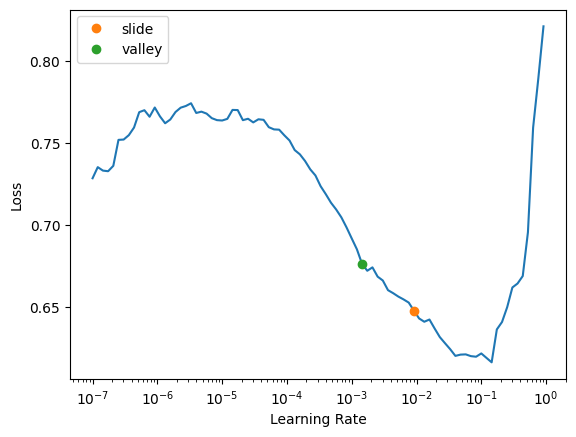

In [79]:
learn.lr_find(suggest_funcs=(slide, valley))

In [83]:
learn.fit(24, lr = 0.008)

epoch,train_loss,valid_loss,accuracy,time
0,0.075292,3.835472,0.738205,00:02
1,0.068883,2.745077,0.741657,00:02
2,0.073198,2.084823,0.731300,00:02
3,0.070303,3.690736,0.735328,00:02
4,0.061644,3.044216,0.734177,00:02
5,0.067588,9.148636,0.730725,00:02
6,0.069236,2.447457,0.723245,00:02
7,0.071854,3.110929,0.738780,00:02
8,0.068966,7.194166,0.724971,00:02
9,0.063202,5.360261,0.742232,00:02


Now that I've fixed the major error with the learner, lets get this into Kaggle.

Lets get the predictions for the test dataset.

In [88]:
test_df = pd.read_csv('test.csv')
test_df.describe (include = 'all')

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name
count,4277,4190,4184,4177,4185,4186.000000,4184,4195.000000,4171.000000,4179.000000,4176.000000,4197.000000,4183
unique,4277,3,2,3265,3,NaN,2,NaN,NaN,NaN,NaN,NaN,4176
top,0013_01,Earth,False,G/160/P,TRAPPIST-1e,NaN,False,NaN,NaN,NaN,NaN,NaN,Cints Erle
freq,1,2263,2640,8,2956,NaN,4110,NaN,NaN,NaN,NaN,NaN,2
mean,NaN,NaN,NaN,NaN,NaN,28.658146,NaN,219.266269,439.484296,177.295525,303.052443,310.710031,NaN
std,NaN,NaN,NaN,NaN,NaN,14.179072,NaN,607.011289,1527.663045,560.821123,1117.186015,1246.994742,NaN
min,NaN,NaN,NaN,NaN,NaN,0.000000,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,NaN
25%,NaN,NaN,NaN,NaN,NaN,19.000000,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,NaN
50%,NaN,NaN,NaN,NaN,NaN,26.000000,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,NaN
75%,NaN,NaN,NaN,NaN,NaN,37.000000,NaN,53.000000,78.000000,33.000000,50.000000,36.000000,NaN


In [104]:
test_df.isna().sum()

PassengerId       0
HomePlanet       87
CryoSleep        93
Cabin           100
Destination      92
Age              91
VIP              93
RoomService      82
FoodCourt       106
ShoppingMall     98
Spa             101
VRDeck           80
Name             94
dtype: int64

In [105]:
add_features(test_df)

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Cabin_Deck,Cabin_number,Cabin_side,PassengerID_Group,PassengerID_Number,PassengerID_GroupSize
0,0013_01,Earth,True,G/3/S,TRAPPIST-1e,27.0,False,0.0,0.0,0.0,0.0,0.0,Nelly Carsoning,G,3,S,0013,01,0
1,0018_01,Earth,False,F/4/S,TRAPPIST-1e,19.0,False,0.0,9.0,0.0,2823.0,0.0,Lerome Peckers,F,4,S,0018,01,0
2,0019_01,Europa,True,C/0/S,55 Cancri e,31.0,False,0.0,0.0,0.0,0.0,0.0,Sabih Unhearfus,C,0,S,0019,01,0
3,0021_01,Europa,False,C/1/S,TRAPPIST-1e,38.0,False,0.0,6652.0,0.0,181.0,585.0,Meratz Caltilter,C,1,S,0021,01,0
4,0023_01,Earth,False,F/5/S,TRAPPIST-1e,20.0,False,10.0,0.0,635.0,0.0,0.0,Brence Harperez,F,5,S,0023,01,0


Whew! Done - Had to re-write my add features as a function. Now lets get the predictions.

In [106]:
tst_dl = learn.dls.test_dl(test_df)
preds,_=learn.get_preds(dl=tst_dl)

In [107]:
preds

tensor([[1.2382e-06, 1.0000e+00],
        [1.0000e+00, 1.2430e-15],
        [2.1902e-02, 9.7810e-01],
        ...,
        [8.5010e-04, 9.9915e-01],
        [3.0899e-01, 6.9101e-01],
        [1.1797e-10, 1.0000e+00]])

In [109]:
preds[:,1]>0.5

tensor([ True, False,  True,  ...,  True,  True,  True])

Lets create that csv file.

In [127]:
test_df['Transported'] = (preds[:,1]>0.5)
test_df.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Cabin_Deck,Cabin_number,Cabin_side,PassengerID_Group,PassengerID_Number,PassengerID_GroupSize,Transported
0,0013_01,Earth,True,G/3/S,TRAPPIST-1e,27.0,False,0.0,0.0,0.0,0.0,0.0,Nelly Carsoning,G,3,S,0013,01,0,True
1,0018_01,Earth,False,F/4/S,TRAPPIST-1e,19.0,False,0.0,9.0,0.0,2823.0,0.0,Lerome Peckers,F,4,S,0018,01,0,False
2,0019_01,Europa,True,C/0/S,55 Cancri e,31.0,False,0.0,0.0,0.0,0.0,0.0,Sabih Unhearfus,C,0,S,0019,01,0,True
3,0021_01,Europa,False,C/1/S,TRAPPIST-1e,38.0,False,0.0,6652.0,0.0,181.0,585.0,Meratz Caltilter,C,1,S,0021,01,0,True
4,0023_01,Earth,False,F/5/S,TRAPPIST-1e,20.0,False,10.0,0.0,635.0,0.0,0.0,Brence Harperez,F,5,S,0023,01,0,True


In [128]:
sub_df = test_df[['PassengerId', 'Transported']]
sub_df.head()
# sub_df.to_csv(sub.csv, index = False)

,PassengerId,Transported
0,0013_01,True
1,0018_01,False
2,0019_01,True
3,0021_01,True
4,0023_01,True


array([[<Axes: title={'center': 'Transported'}>]], dtype=object)

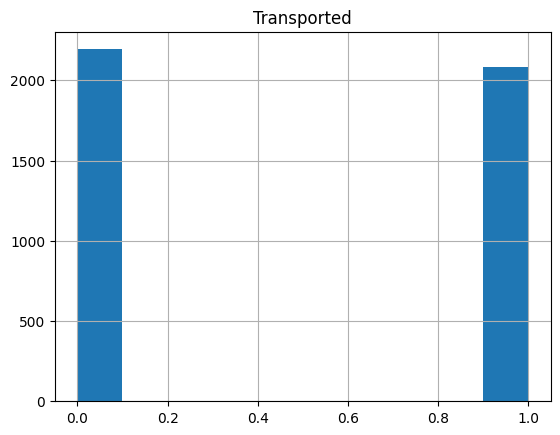

In [119]:
sub_df.hist()

In [129]:
sub_df.to_csv('sub.csv', index = False)

In [130]:
!head sub.csv

PassengerId,Transported
0013_01,True
0018_01,False
0019_01,True
0021_01,True
0023_01,True
0027_01,False
0029_01,True
0032_01,True
0032_02,True


In [131]:
!kaggle competitions submit -f sub.csv -m "Initial submission to Kaggle. Iter1" spaceship-titanic

100%|███████████████████████████████████████| 56.5k/56.5k [00:00<00:00, 132kB/s]
Successfully submitted to Spaceship Titanic

In [132]:
!kaggle competitions leaderboard titanic --show | grep -E -n -e "Zach Zacharia" | tail -n 1

12168:10862059  Zach Zacharia                                          2023-09-02 22:32:42  0.75358  
